텐서플로우 버전 확인

In [ ]:
%tensorflow_version

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x


케라스 확인

In [ ]:
import keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


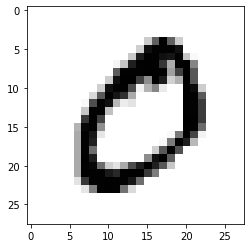

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

plt.imshow(x_train[1], cmap=plt.cm.gray_r, interpolation="nearest")

In [ ]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)


X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)
print("Y_train[0] : ", Y_train[1])
print("Y_test[0] : ", Y_test[0])

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)
Y_train[0] :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Y_test[0] :  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 3s 3ms/step - loss: 0.2235 - accuracy: 0.9350
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9745
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0525 - accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9875
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9922
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0174 - accuracy: 0.9944
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0154 - accuracy: 0.9945
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0162 - accuracy: 0.9944
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0128 - accuracy: 0.9959

In [ ]:
score = model.evaluate(X_test, Y_test)

print('Test loss : ', score[0])
print('Test accuracy : ', score[1])


313/313 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9803
Test loss :  0.07206504791975021
Test accuracy :  0.9803000092506409


In [ ]:
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

print(predicted_classes)
print(correct_indices)
print(incorrect_indices)

[7 2 1 ... 4 5 6]
[   0    1    2 ... 9997 9998 9999]
[ 151  158  217  247  321  340  445  449  457  582  583  619  659  720
  882  900  947  956 1014 1112 1156 1182 1194 1226 1232 1242 1247 1299
 1319 1393 1522 1527 1530 1549 1553 1554 1587 1609 1621 1626 1681 1748
 1751 1790 1878 1901 1913 1941 1982 1984 2004 2018 2033 2043 2053 2098
 2109 2129 2130 2135 2148 2182 2293 2369 2387 2406 2414 2426 2488 2597
 2607 2648 2654 2720 2730 2810 2877 2921 2927 2939 2995 3073 3117 3218
 3225 3284 3342 3383 3405 3490 3503 3520 3549 3558 3727 3780 3853 3893
 3906 3941 4063 4065 4163 4176 4199 4201 4224 4248 4271 4289 4437 4443
 4497 4536 4548 4551 4807 4814 4823 4838 4860 4880 4956 5046 5078 5140
 5203 5457 5642 5676 5734 5745 5757 5887 5936 5937 5955 5973 5982 6011
 6023 6046 6059 6166 6173 6421 6555 6558 6559 6571 6572 6574 6597 6625
 6641 6651 6755 6783 6847 7216 7258 7434 7472 7800 7821 7902 7915 8020
 8094 8243 8246 8277 8325 8527 9009 9015 9024 9163 9540 9587 9634 9664
 9669 9679 9692 9729 97

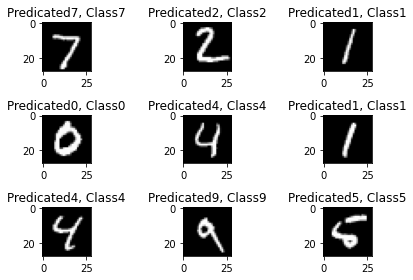

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28, 28), cmap="gray")
  plt.title("Predicated{}, Class{}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()

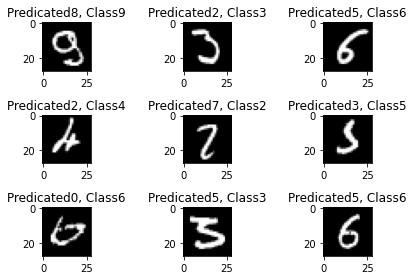

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3, i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28, 28), cmap="gray")
  plt.title("Predicated{}, Class{}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

In [ ]:
from keras.models import load_model

model.save('mnist_model.h5')

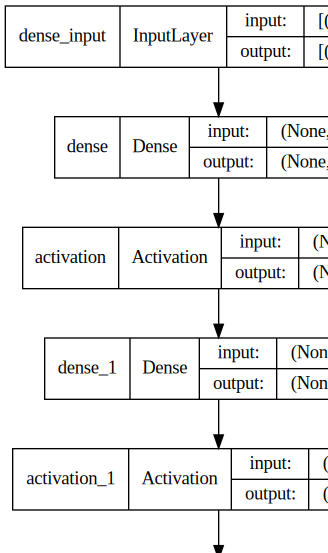

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [ ]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

#데이터 준비
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0], 5)
xhat = x_test[xhat_idx]

#모델 불러오기
from keras.models import load_model
model = load_model('mnist_model.h5')

#모델 사용하기
y_prob = model.predict(xhat, verbose = 0)
yhat = y_prob.argmax(axis=1)

for i in range(5):
  print('Predict : ' + str(yhat[i]) + ', ' + str(argmax(y_test[xhat_idx[i]])))


Predict : 0, 0
Predict : 2, 2
Predict : 0, 0
Predict : 7, 7
Predict : 5, 5
